# Bike Project 
## by Leli
### Capital Bike Share (Washington, D.C.) Kaggle data set
Fanaee-T, Hadi, and Gama, Joao, Event labeling combining ensemble detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.


In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import OLS (ordinary least square - Mathematical method of finding the coeff in linar reg model) from statsmodels
from statsmodels.api import OLS, add_constant
plt.rcParams['figure.figsize'] = (15,6)

In [21]:
bike_df = pd.read_csv('../data/train.csv', index_col= 0, parse_dates=True)
bike_df.shape

(10886, 11)

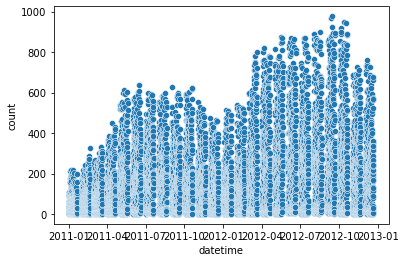

In [5]:
sns.scatterplot(x = 'datetime', y = 'count', data = bike_df)

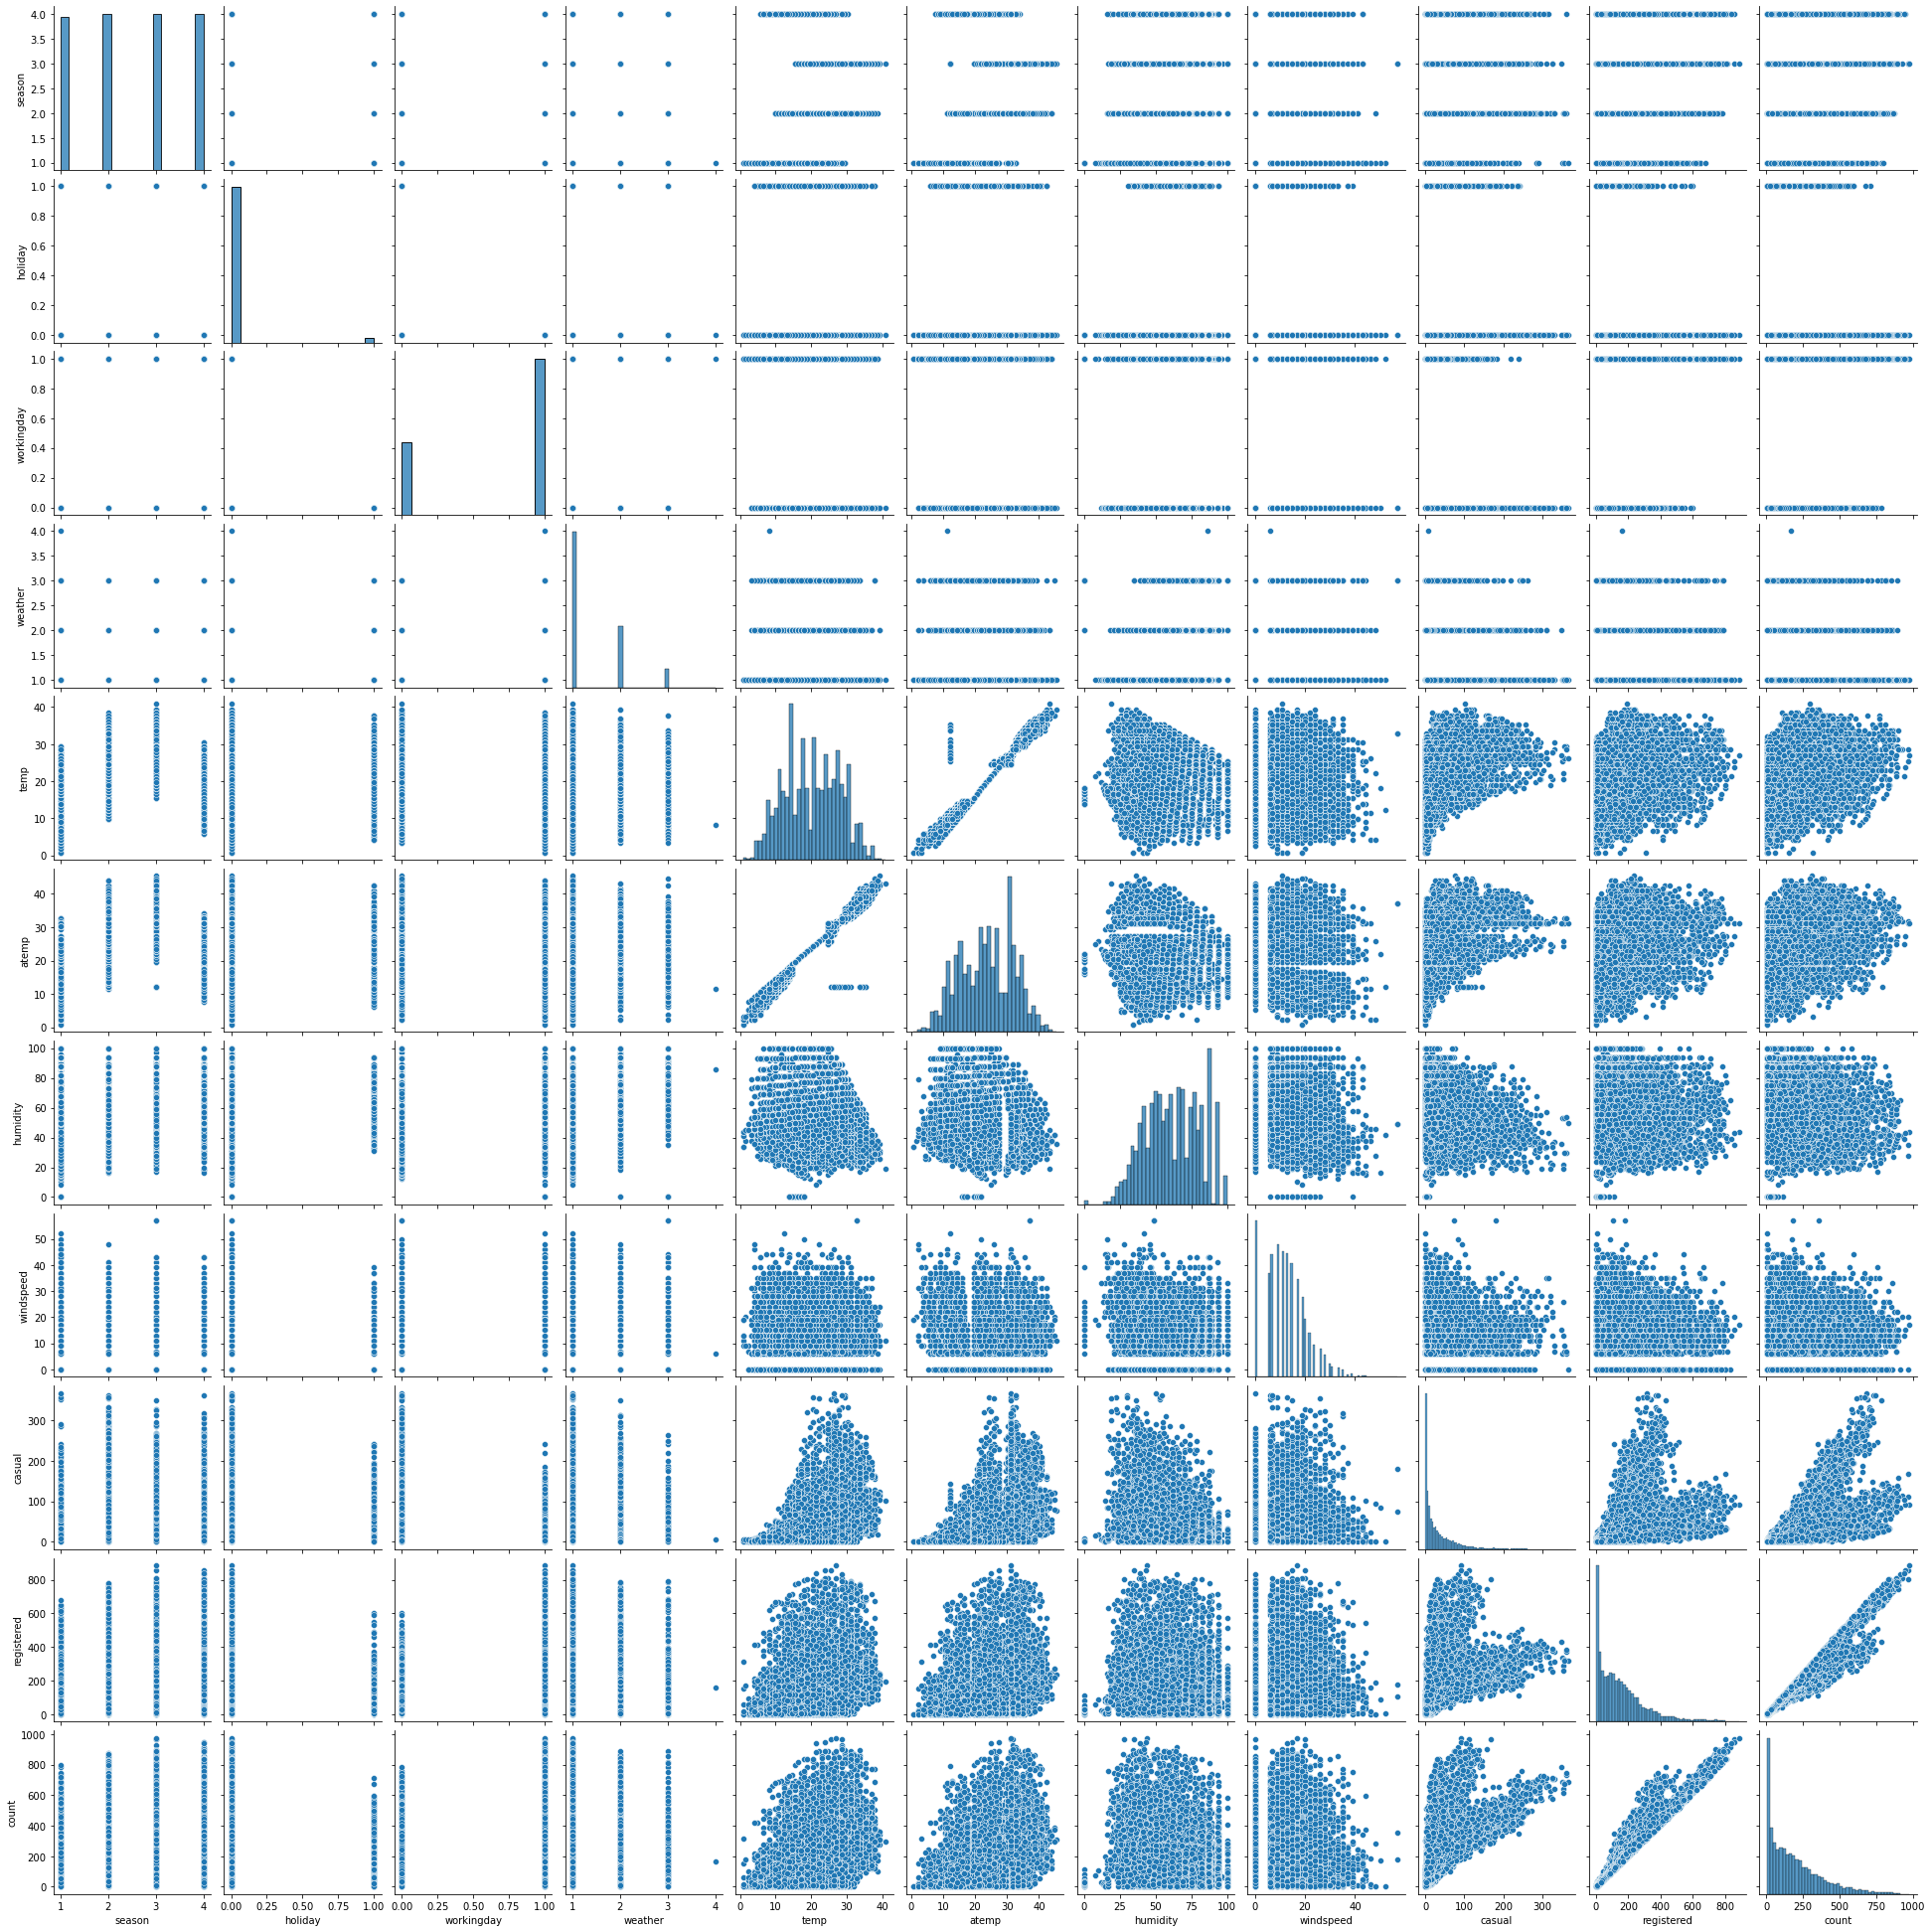

In [6]:
sns.pairplot(bike_df)

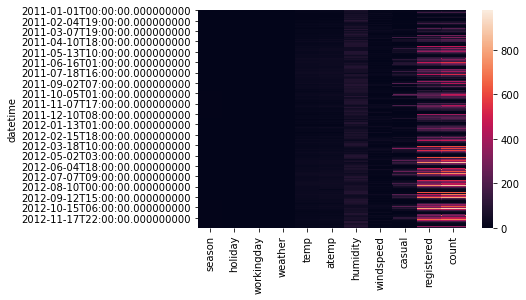

In [10]:
sns.heatmap(data = bike_df )

# Train Split 

In [11]:
from sklearn.model_selection import train_test_split

In [16]:
X = bike_df.drop(['count', 'casual', 'registered'], axis = 1)
y = bike_df['count']
y_casual = bike_df['casual']
y_registerd = bike_df['registered']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
bike_df_2011 = bike_df[bike_df.index.year == 2011]
bike_df_2011

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2011-12-19 19:00:00,4,0,1,2,14.76,17.425,53,11.0014,17,234,251
2011-12-19 20:00:00,4,0,1,1,16.40,20.455,40,11.0014,9,197,206
2011-12-19 21:00:00,4,0,1,2,14.76,17.425,53,8.9981,15,112,127


In [19]:
bike_df.index.year

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=10886)

In [22]:
bike_df_2012 = bike_df[bike_df.index.year == 2012]

In [29]:
last_year = bike_df_2012.shift(-365)

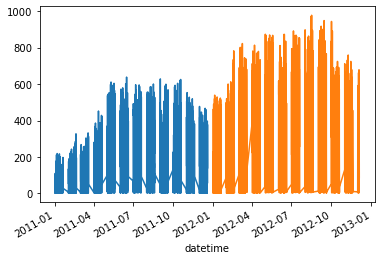

In [30]:
#downsample['count']['2011'].plot()
bike_df_2011['count'].plot()
last_year['count'].plot()

In [34]:
mean_2011 = bike_df.resample('D').mean() #downsample = df.resample('D').mean()

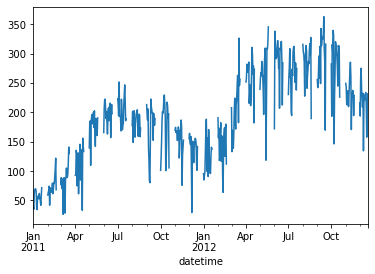

In [35]:
mean_2011['count'].plot()

In [36]:
last_year = mean_2011.shift(-365)

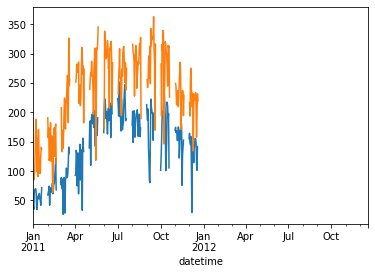

In [38]:
mean_2011['count']['2011'].plot()
last_year['count'].plot()

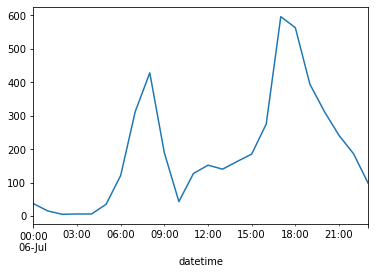

In [45]:
bike_df['count']['2011-07-06'].plot()


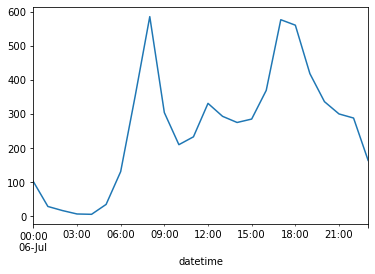

In [46]:
bike_df['count']['2012-07-06'].plot()

In [89]:
test = bike_df[:]

test['hour'] = test.index.hour
test['day'] = test.index.day
test['year'] = test.index.year
test['month'] = test.index.month
test['dayoftheweek'] = test.index.dayofweek
test

<ipython-input-89-8a60a8a53c65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['hour'] = test.index.hour
<ipython-input-89-8a60a8a53c65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['day'] = test.index.day
<ipython-input-89-8a60a8a53c65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,year,month,dayoftheweek
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,2011,1,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,2011,1,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,2011,1,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,2011,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,19,2012,12,2
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,19,2012,12,2
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,19,2012,12,2


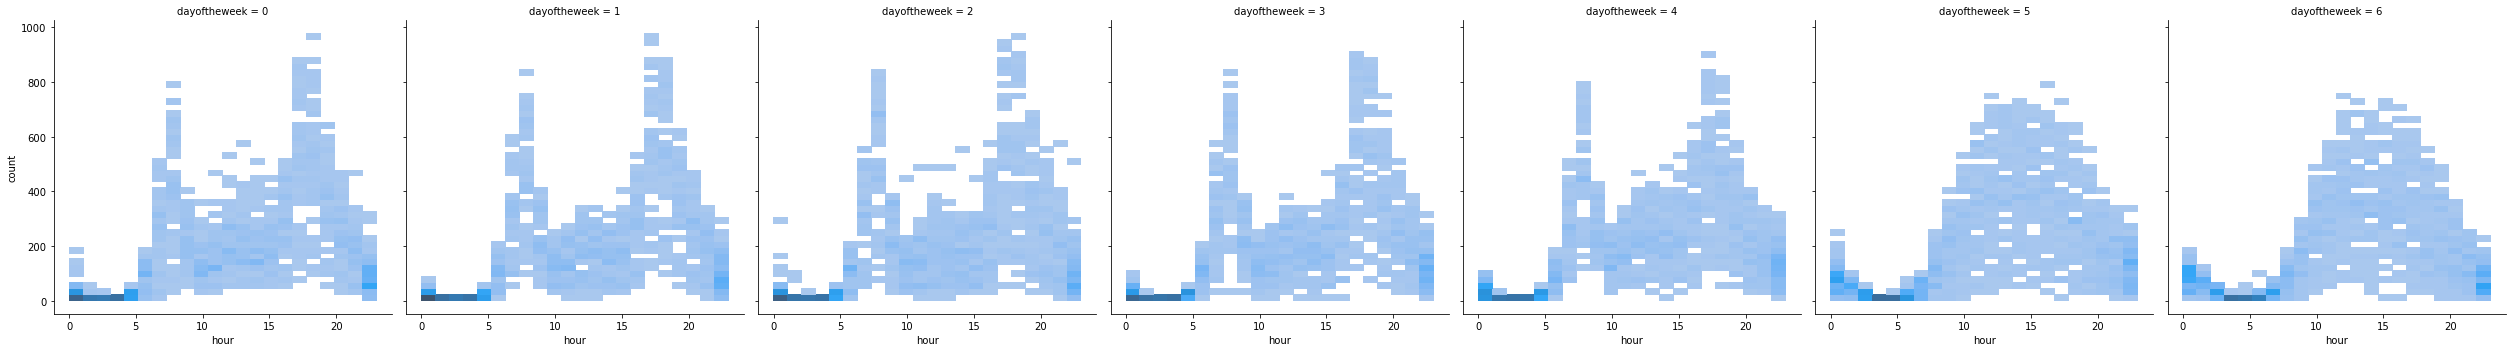

In [90]:
sns.displot(x = 'hour', y = 'count', col = 'dayoftheweek', data = test)

clear correlation with weekdtay

In [92]:
from sklearn.preprocessing import PowerTransformer

In [93]:
pt = PowerTransformer(method='box-cox', standardize=False)

In [94]:
y_boxcox = bike_df[['count']]

In [95]:
pt.fit(y_boxcox)
test['boxcox'] = pt.transform(y_boxcox)

<ipython-input-95-13711e8983c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['boxcox'] = pt.transform(y_boxcox)


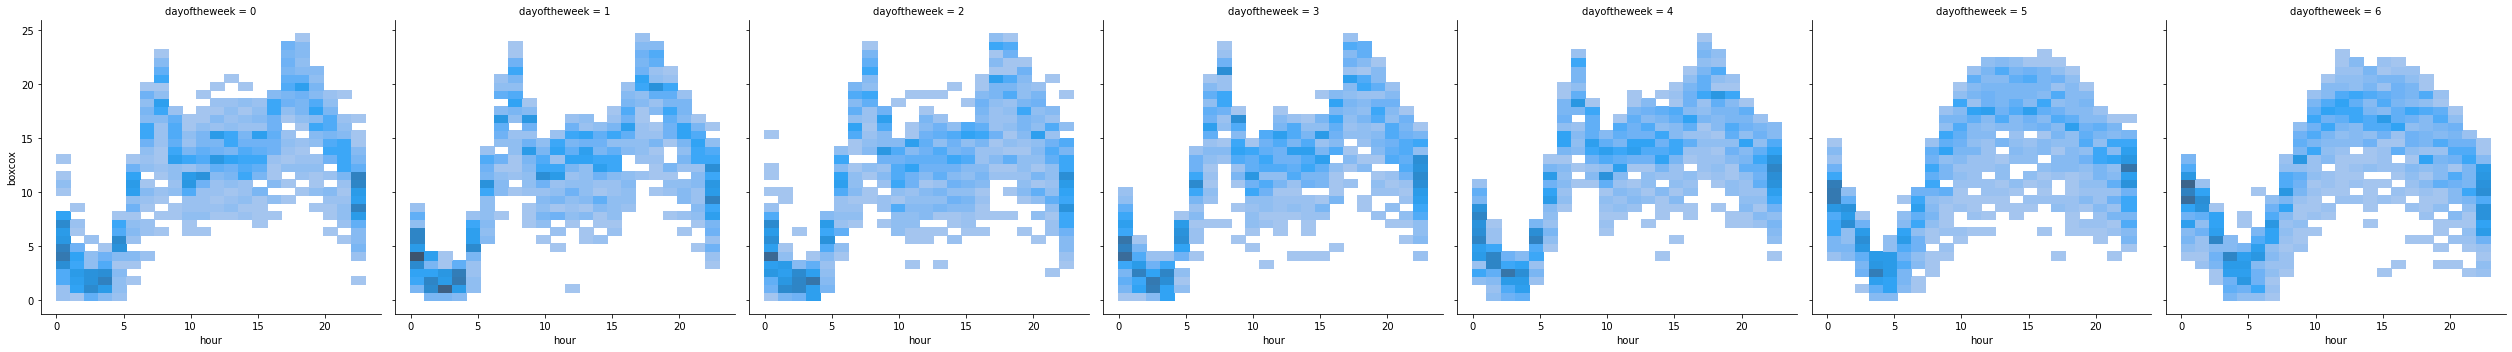

In [97]:
sns.displot(x = 'hour', y = 'boxcox' ,col = 'dayoftheweek', data = test)

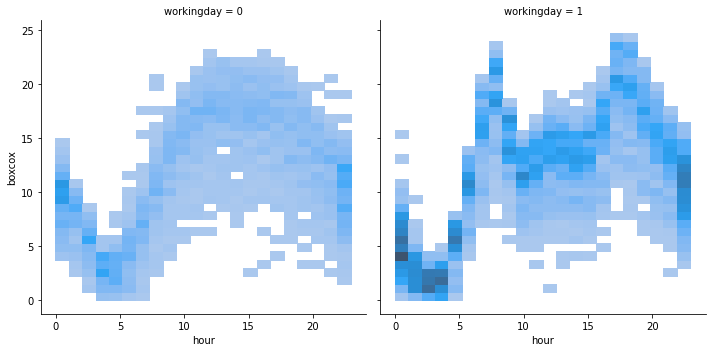

In [189]:
sns.displot(x='hour', y='boxcox', col = 'workingday', data = test)

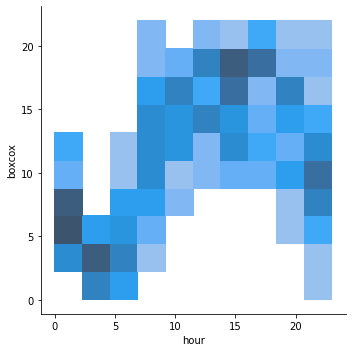

In [190]:
sns.displot(x = 'hour', y = 'boxcox', data = test[(test.workingday == 0) & (test.dayoftheweek < 5)])

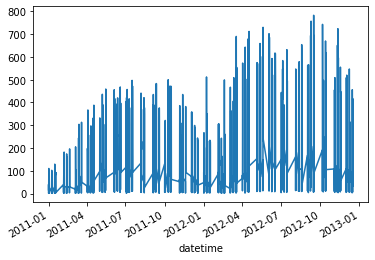

In [100]:
test[test.workingday==0]['count'].plot()

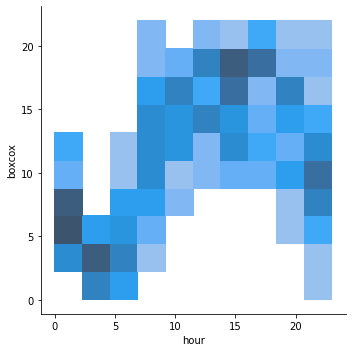

In [102]:
# weekdays that are holidays
sns.displot(x = 'hour', y = 'boxcox', data = test[(test.workingday == 0) & (test.dayoftheweek < 5)])

In [103]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour', 'day',
       'year', 'month', 'dayoftheweek', 'boxcox'],
      dtype='object')

In [105]:
test.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [106]:
# felt temperature in celcius
test.atemp.describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

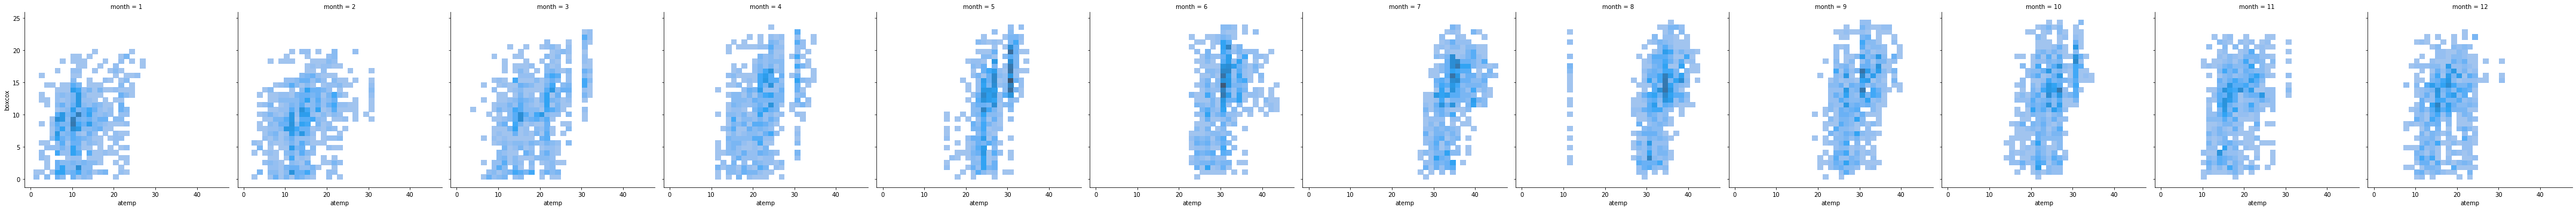

In [115]:
sns.displot(x = 'atemp',y = 'boxcox',
            #hue = 'month',
            col = 'month',
            data = test)

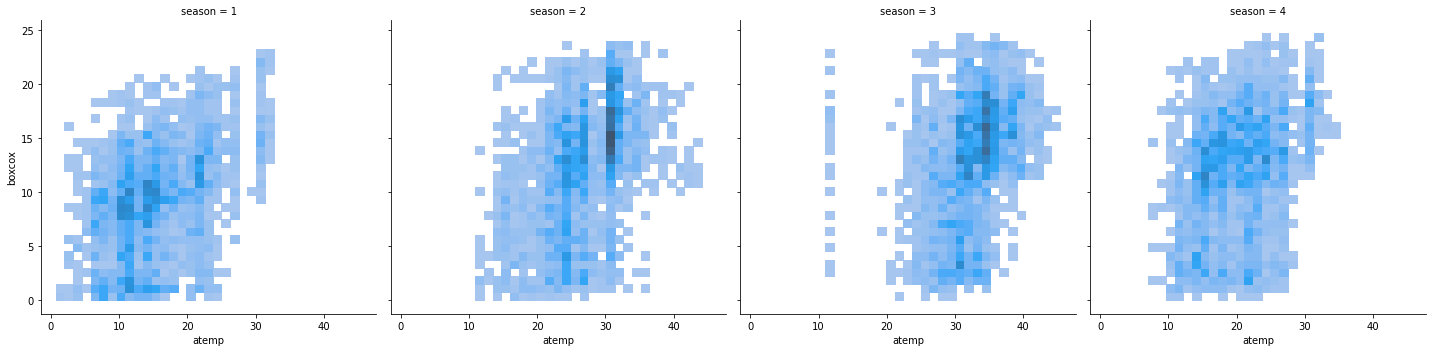

In [116]:
sns.displot(x = 'atemp', y ='boxcox',
           col = 'season',
            data = test
           )

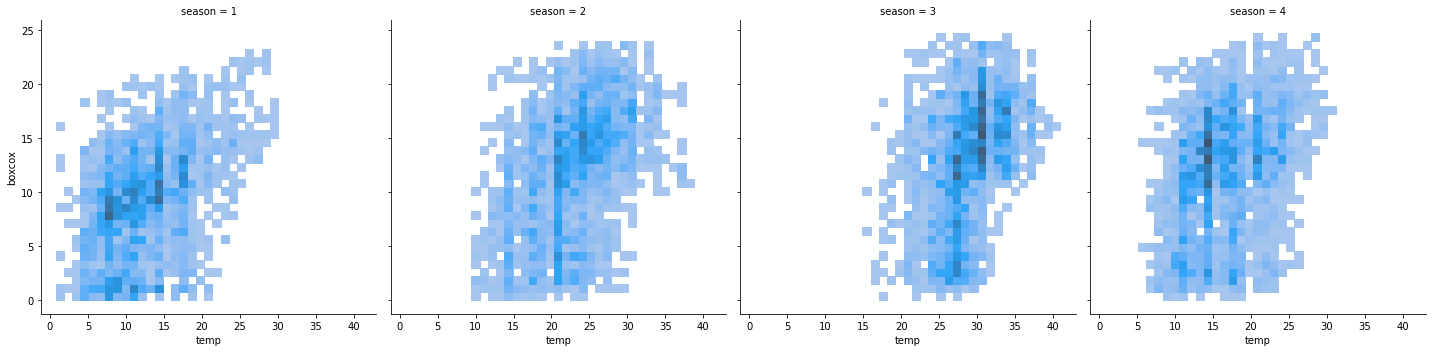

In [117]:
sns.displot(x = 'temp', y ='boxcox',
           col = 'season',
            data = test
           )

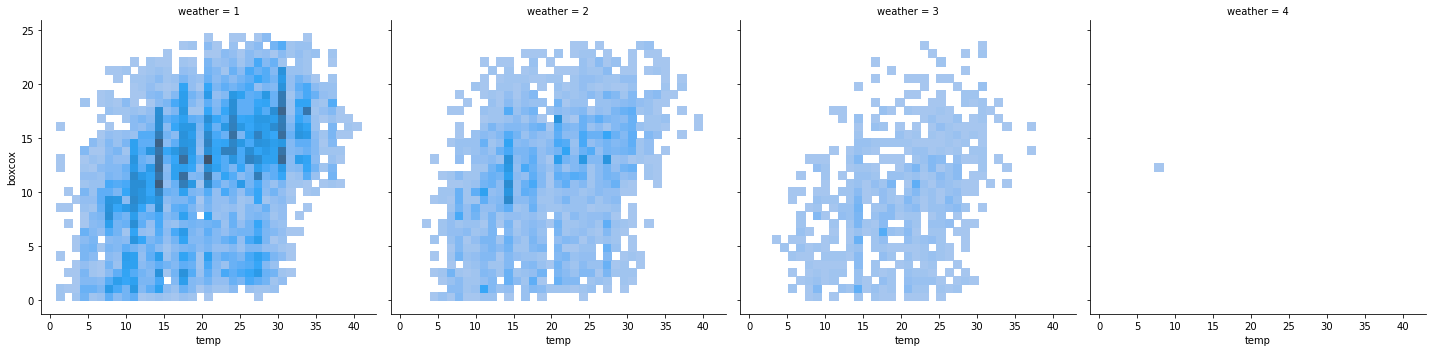

In [120]:
# weather
sns.displot(x = 'temp', y = 'boxcox',
            col = 'weather',
             data = test
            )

weather definitive strong factor 

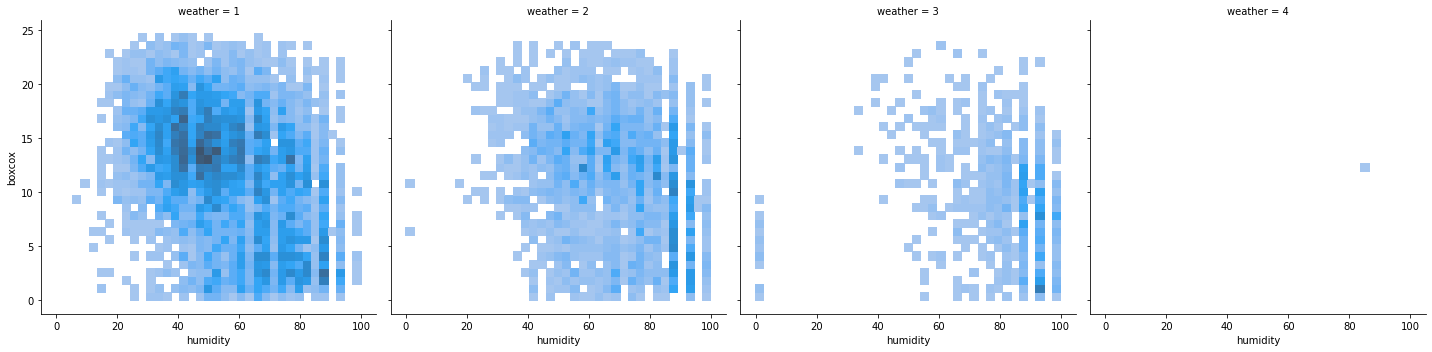

In [121]:
# humidity
sns.displot(x = 'humidity', y = 'boxcox',
            col = 'weather',
             data = test
            )

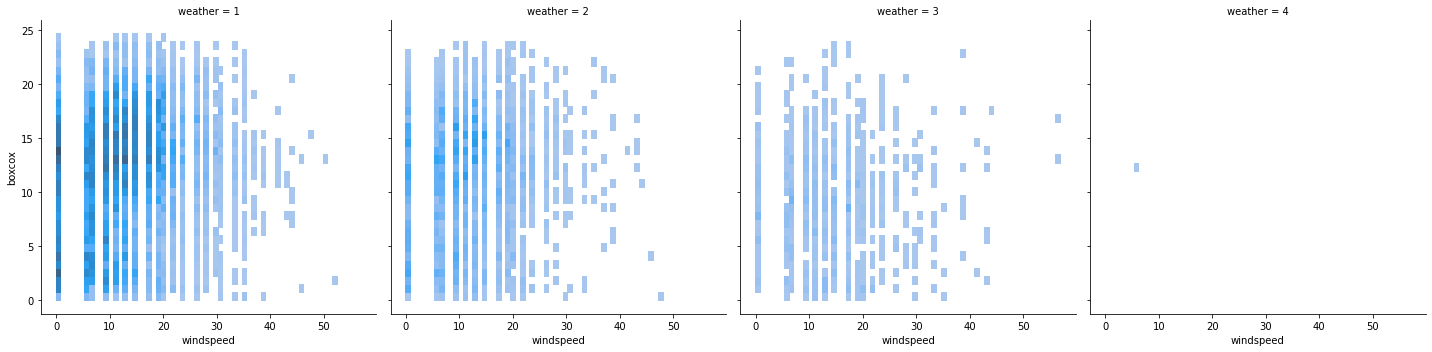

In [122]:
# windspeed
sns.displot(x = 'windspeed', y = 'boxcox',
            col = 'weather',
             data = test
            )

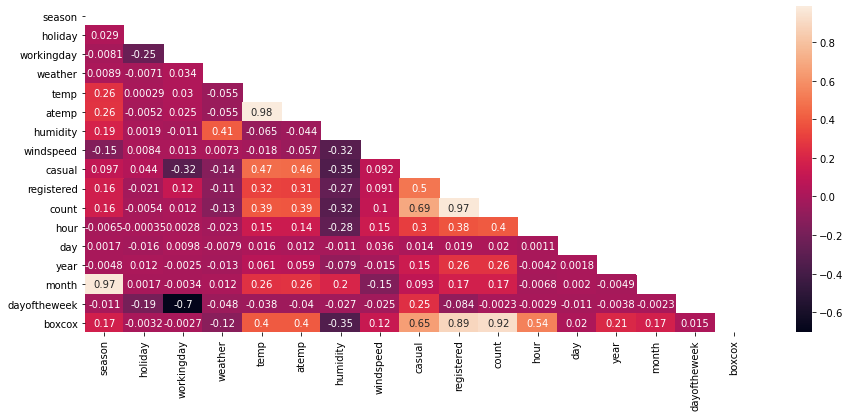

In [128]:
mask = np.triu(np.ones_like(test.corr(), dtype=np.bool))
sns.heatmap(test.corr(), annot=True, mask=mask)


In [144]:
X_mit_test = test.drop('boxcox', axis = 1)
y_mit_test = test['boxcox']

In [145]:
# Create a list of features
forward_features = []

# Original features
feature_list = X_mit_test.columns

In [146]:
possible_models = pd.DataFrame(columns=['features', 'p', 'adj_r2'])
# Run a linear regression separately on each of the features

while len(feature_list) > 0:
    forward_selection = pd.DataFrame(columns=['features', 'p', 'adj_r2'])
    for feature in feature_list:
        m_feature = OLS(y_mit_test, X_mit_test[forward_features + [feature]])
        result = m_feature.fit()
        forward_selection = forward_selection.append({
                                    'feature': feature
                                  , 'features': forward_features + [feature]
                                  , 'p': result.pvalues.loc[feature]
                                  , 'adj_r2': result.rsquared_adj}
                                  , ignore_index=True)

    if forward_selection.sort_values('p').iloc[0].p < 0.05:
        best_feature = forward_selection.sort_values('p').iloc[0].feature
        forward_features.append(best_feature)
        feature_list = feature_list.drop(best_feature)
        best_model = forward_selection[forward_selection['feature']==best_feature]
        possible_models = possible_models.append(best_model, ignore_index=True)

    else:
        break

In [147]:
# Look at the selected features
forward_features

['season',
 'temp',
 'casual',
 'workingday',
 'registered',
 'count',
 'hour',
 'year',
 'humidity',
 'dayoftheweek',
 'month',
 'atemp',
 'windspeed']

In [148]:
# Look at the features left behind
feature_list

Index(['holiday', 'weather', 'day'], dtype='object')

In [149]:
# Look at the models
possible_models

,features,p,adj_r2,feature
0,[season],0.000000e+00,0.724013,season
1,"[season, temp]",0.000000e+00,0.824303,temp
2,"[season, temp, casual]",0.000000e+00,0.867623,casual
3,"[season, temp, casual, workingday]",0.000000e+00,0.886960,workingday
4,"[season, temp, casual, workingday, registered]",0.000000e+00,0.955871,registered
5,"[season, temp, casual, workingday, registered,...",0.000000e+00,0.955871,count
6,"[season, temp, casual, workingday, registered,...",0.000000e+00,0.971080,hour
7,"[season, temp, casual, workingday, registered,...",0.000000e+00,0.977270,year
8,"[season, temp, casual, workingday, registered,...",1.581521e-32,0.977561,humidity
9,"[season, temp, casual, workingday, registered,...",6.473079e-05,0.977592,dayoftheweek


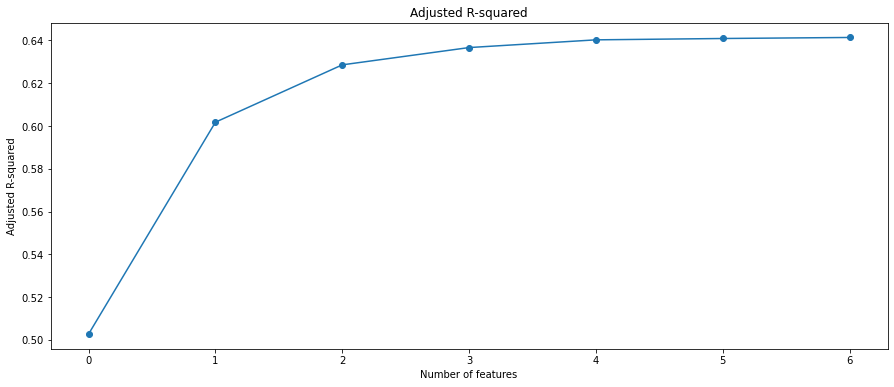

In [136]:
# Print the Adjusted R-squared
possible_models['adj_r2'].plot(marker="o")
plt.title('Adjusted R-squared')
plt.xlabel('Number of features')
plt.ylabel('Adjusted R-squared')
plt.show()

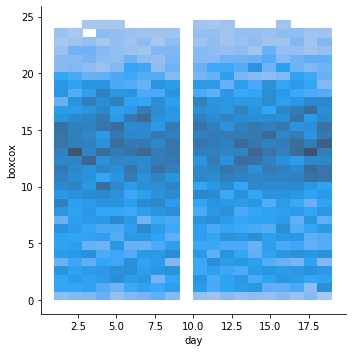

In [151]:
sns.displot(x = 'day', y = 'boxcox', data = test)

In [196]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour', 'day',
       'year', 'month', 'dayoftheweek', 'boxcox'],
      dtype='object')

In [254]:
test.humidity.describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

### day of the month can be ignored

In [250]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

In [227]:
# combine weather with temperature and season 
'''
>>> from sklearn.preprocessing import PolynomialFeatures
>>> X = np.arange(6).reshape(3, 2)
>>> X
array([[0, 1],
       [2, 3],
       [4, 5]])
>>> poly = PolynomialFeatures(2)
>>> poly.fit_transform(X)
array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])
>>> poly = PolynomialFeatures(interaction_only=True)
>>> poly.fit_transform(X)
array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])
'''
def weather_season_temp(df):
    poly = PolynomialFeatures(degree=3, interaction_only=True)
    result = poly.fit_transform(df)
    return result

In [255]:
transformer = ColumnTransformer([
   
    ('weather onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['weather', 'season']),
    ('passthrough', 'passthrough', ['workingday', 'holiday','hour', 'day',
       'year', 'month', ]),
    ('scale', MinMaxScaler(), ['temp', 'atemp', 'humidity', 'windspeed'])
    #('poly', FunctionTransformer(weather_season_temp), ['weather', 'season', 'temp'])
])

In [256]:
transformer.fit(X_mit_test)

ColumnTransformer(transformers=[('weather onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['weather', 'season']),
                                ('passthrough', 'passthrough',
                                 ['workingday', 'holiday', 'hour', 'day',
                                  'year', 'month']),
                                ('scale', MinMaxScaler(),
                                 ['temp', 'atemp', 'humidity', 'windspeed'])])

In [257]:
# TODO hour year 
X_trans = transformer.transform(X_mit_test)
X_trans_dataframe = pd.DataFrame(X_trans, columns = ['weather1', 'weather2', 'weather3', 'weather4', 
                                                     'Q1', 'Q2', 'Q3', 'Q4', 
                                                     'workingday', 'holiday',
                                                     'hour', 'day','year', 'month', 
                                                     'temp', 'atemp','humidity', 'windspeed',
                                                     
                                                    ]
                                )
X_trans_dataframe

,weather1,weather2,weather3,weather4,Q1,Q2,Q3,Q4,workingday,holiday,hour,day,year,month,temp,atemp,humidity,windspeed
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2011.0,1.0,0.224490,0.305068,0.81,0.000000
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2011.0,1.0,0.204082,0.288064,0.80,0.000000
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2011.0,1.0,0.204082,0.288064,0.80,0.000000
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2011.0,1.0,0.224490,0.305068,0.75,0.000000
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2011.0,1.0,0.224490,0.305068,0.75,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,19.0,19.0,2012.0,12.0,0.367347,0.423649,0.50,0.456213
10882,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,20.0,19.0,2012.0,12.0,0.346939,0.372860,0.57,0.263195
10883,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,21.0,19.0,2012.0,12.0,0.326531,0.338964,0.61,0.263195
10884,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,22.0,19.0,2012.0,12.0,0.326531,0.372860,0.61,0.105325


In [187]:
pd.crosstab(test.season, test.month)

month,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


In [246]:
interactions_test = X_trans_dataframe[:]
interactions_test.index = X_mit_test.index
interactions_test['count'] = y


#data = X.join(pd.Series(y, name='prices'))

<ipython-input-246-b546bdb2e4ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions_test['count'] = y


In [247]:
interactions_test

,0,1,2,3,4,5,6,7,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1.0,1.0,1.0,9.84,1.0,9.84,9.84,9.84,16
2011-01-01 01:00:00,1.0,1.0,1.0,9.02,1.0,9.02,9.02,9.02,40
2011-01-01 02:00:00,1.0,1.0,1.0,9.02,1.0,9.02,9.02,9.02,32
2011-01-01 03:00:00,1.0,1.0,1.0,9.84,1.0,9.84,9.84,9.84,13
2011-01-01 04:00:00,1.0,1.0,1.0,9.84,1.0,9.84,9.84,9.84,1
...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1.0,1.0,4.0,15.58,4.0,15.58,62.32,62.32,336
2012-12-19 20:00:00,1.0,1.0,4.0,14.76,4.0,14.76,59.04,59.04,241
2012-12-19 21:00:00,1.0,1.0,4.0,13.94,4.0,13.94,55.76,55.76,168


/Users/lelischiestl/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lelischiestl/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lelischiestl/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lelischiestl/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lelischiestl/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lelischiestl/anaconda3/lib/python3.8/site-packages/seaborn/

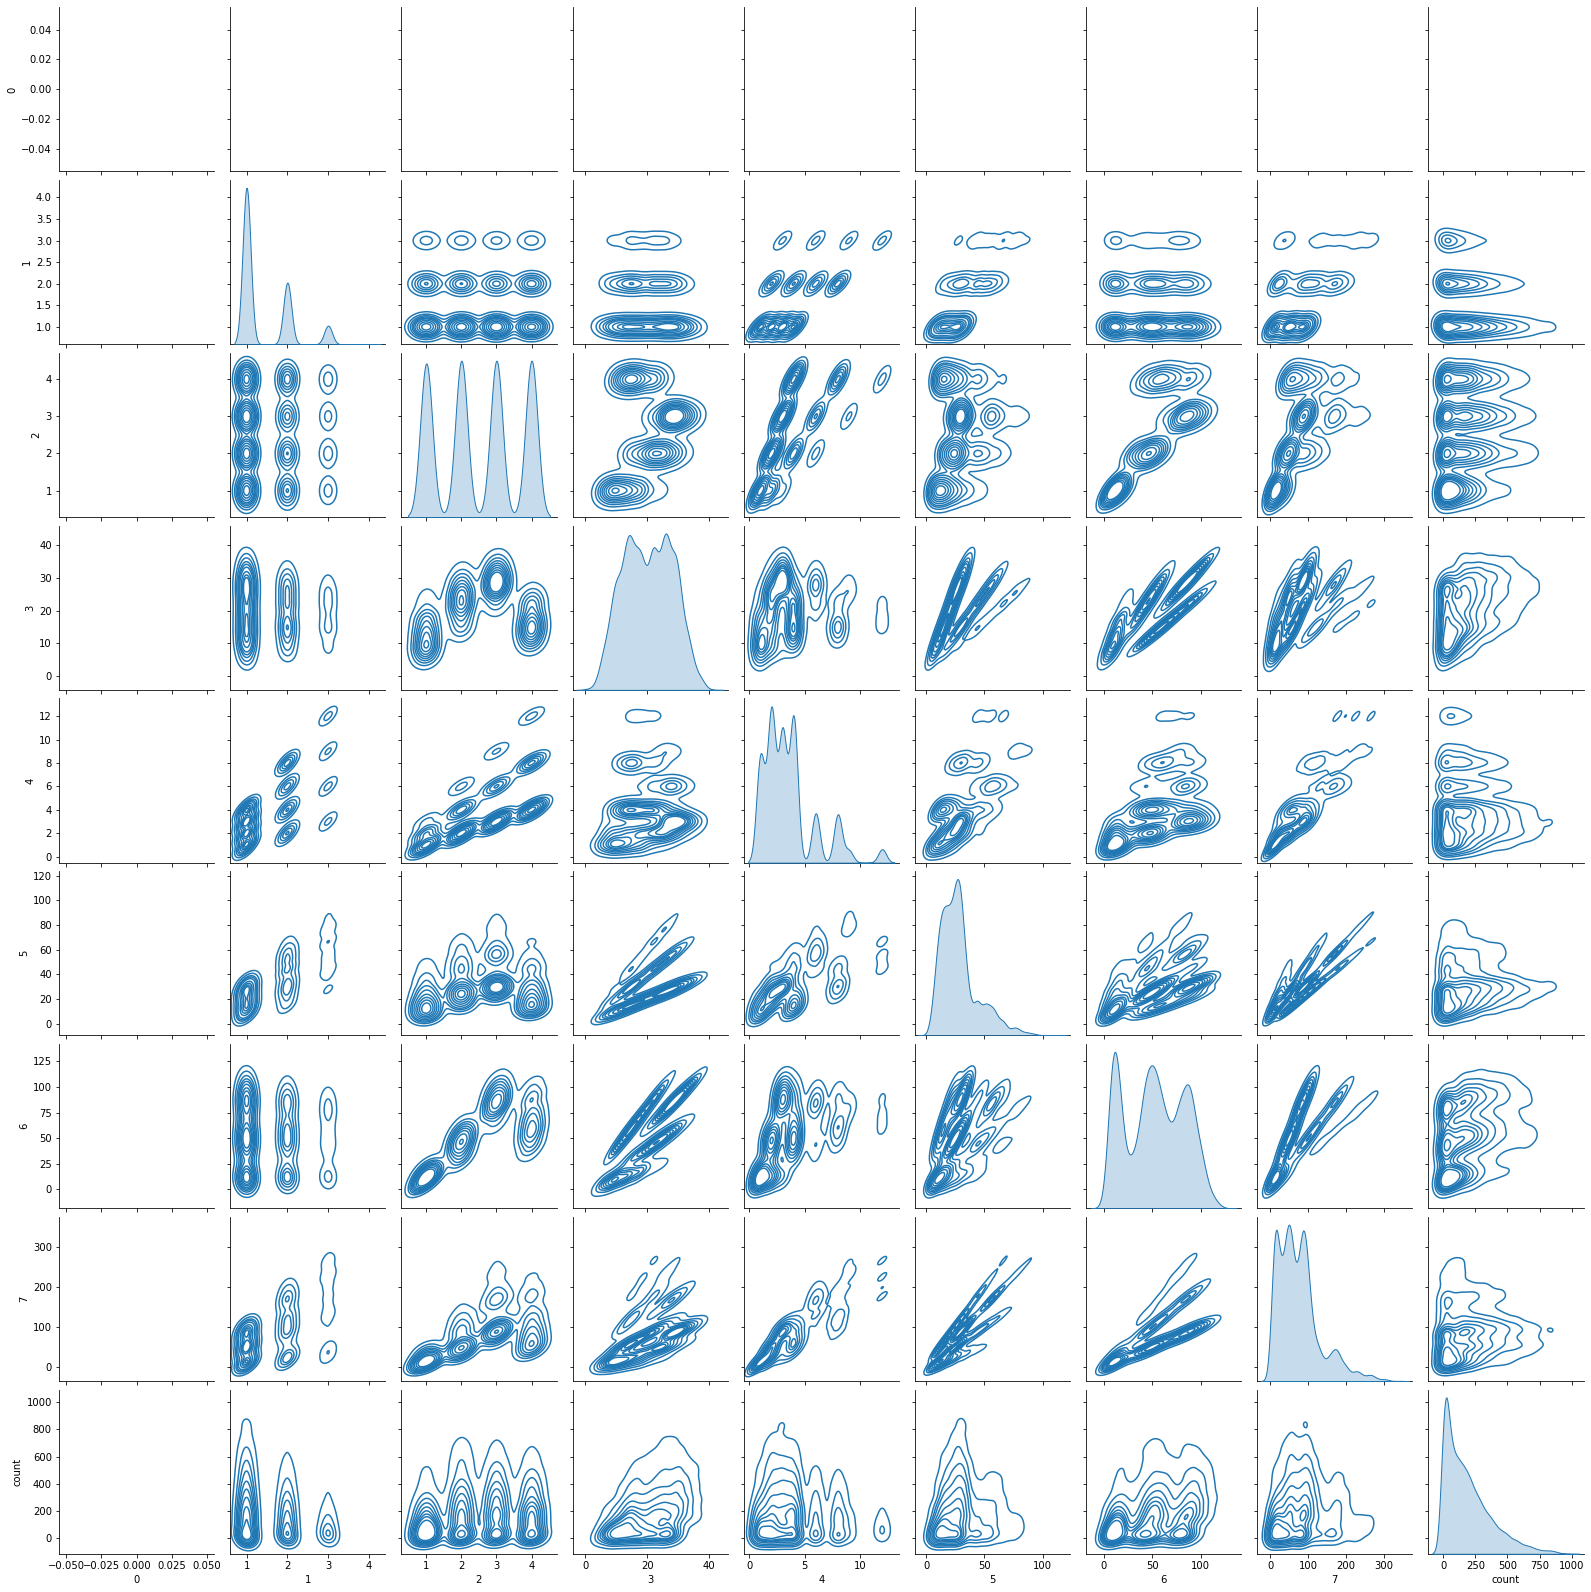

In [249]:
sns.pairplot(interactions_test,kind = 'kde' )

# von vorne 

In [367]:
bike = pd.read_csv('../data/train.csv', parse_dates=True, 
                   index_col=0
                  )
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [368]:
X = bike.drop(['count', 'casual', 'registered'], axis = 1)
y = bike['count']
y_casual = bike['casual']
y_registerd = bike['registered']

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [373]:
transformer = ColumnTransformer([
    ('weather onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['weather', 'season']),
    ('passthrough', 'passthrough', ['workingday', 'holiday','hour', 'day',
       'year', 'month', ]),
    ('scale', MinMaxScaler(), ['temp', 'atemp', 'humidity', 'windspeed']),
    #('poly', FunctionTransformer(weather_season_temp), ['weather', 'season', 'temp'])
])

In [364]:
transformer.fit(X_train)
X_trans = transformer.transform(X_train)
X_trans

array([['2011-07-06 05:00:00'],
       ['2012-08-04 16:00:00'],
       ['2012-07-11 15:00:00'],
       ...,
       ['2011-12-18 16:00:00'],
       ['2011-02-19 07:00:00'],
       ['2012-05-02 07:00:00']], dtype=object)

In [374]:
def fit_and_transform_X_train(X_train):
    X['hour'] = X_train.index.hour
    X['day'] = X_train.index.day
    X['year'] = X_train.index.year
    X['month'] = X_train.index.month
    
    tranformer.fit(X_train)
    X_trans = transformer.transform(X_train)
    
    X = X.join(X_trans)
    return X
    '''
    test = bike_df[:]

test['hour'] = test.index.hour
test['day'] = test.index.day
test['year'] = test.index.year
test['month'] = test.index.month
test['dayoftheweek'] = test.index.dayofweek
test
    '''


In [378]:
X_fitted = fit_and_transform_X_train
pd.DataFrame(X_fitted)

ValueError: DataFrame constructor not properly called!

In [ ]:
X